# Study of [EPIC247418783](https://exofop.ipac.caltech.edu/k2/edit_target.php?id=247418783)

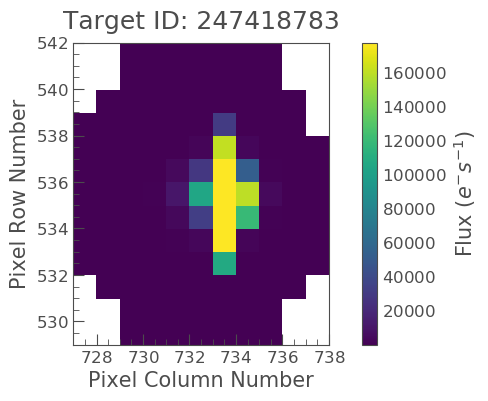

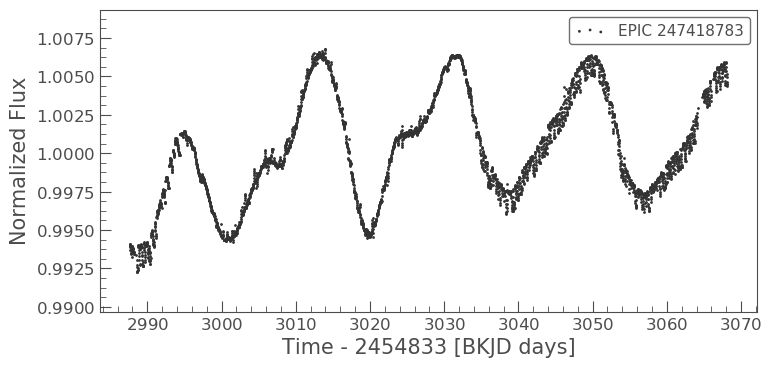

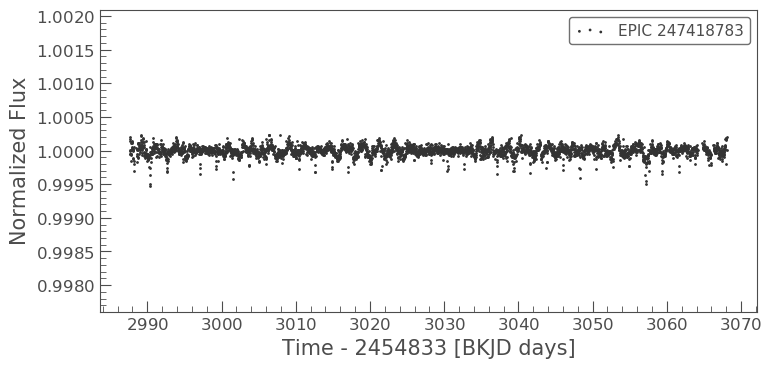

In [11]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from lightkurve import search_lightcurvefile
from lightkurve import search_targetpixelfile
target = '247418783'

tpf = search_targetpixelfile(target).download()
tpf.plot()
lc = search_lightcurvefile(target).download().PDCSAP_FLUX.remove_nans()
lc.scatter()
corr_lc = lc.to_corrector("sff").correct(windows=40)
corr_lc_f, trend = corr_lc.flatten(window_length=401, return_trend=True)
corr_lc_f = corr_lc_f.remove_outliers(sigma_lower=50,sigma_upper=3)
corr_lc_f.scatter()

Best Fit Period: 8.9015 days


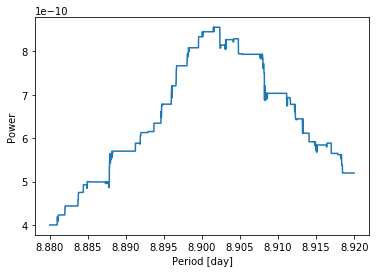

In [20]:
from astropy.stats import BoxLeastSquares
import matplotlib.pyplot as plt

bls = BoxLeastSquares(corr_lcp_f.time, corr_lcp_f.flux, corr_lcp_f.flux_err)
periods = np.arange(8.88, 8.92, 0.00001)
durations = np.arange(0.005, 0.15, 0.001)
periodogram = bls.power(periods, durations)

plt.plot(periodogram.period, periodogram.power)
plt.ylabel("Power")
plt.xlabel("Period [day]");

period_p = periods[np.argmax(periodogram.power)]
print('Best Fit Period: {:0.4f} days'.format(period_p))

2.2253874999997962

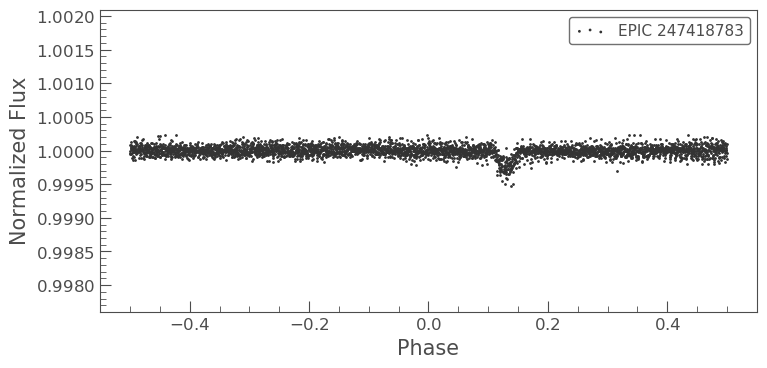

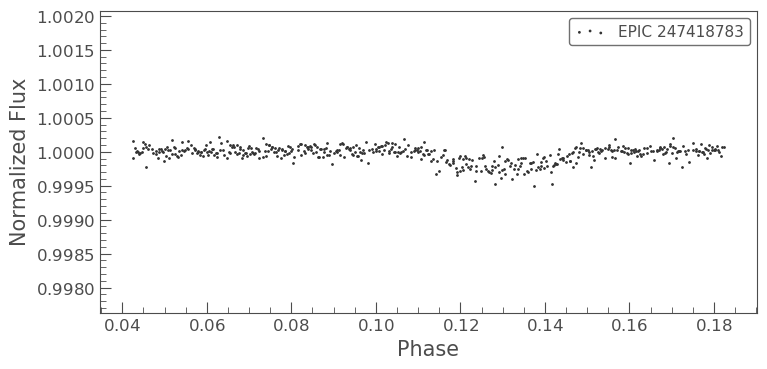

In [31]:
period_f = period_p / 4
lcf = corr_lc_f.fold(period=period_f,t0=1.4)
lcf.scatter()
lc_transit = lcf[2000:2500].normalize()
lc_transit.scatter()
lcf.time_format = 'jd'
period_f